In [97]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
import tweepy,sys,jsonpickle
import xlrd
import xlwt
from sklearn.feature_extraction.text import CountVectorizer
import nltk 
import string
import re
from textblob import TextBlob

# Creating list to append tweet data to
tweets_list2 = []
data = [['2016-01-01', '2016-12-31'], ['2017-01-01', '2017-12-31'], ['2018-01-01', '2018-12-31'], ['2019-01-01', '2019-12-31'], ['2020-01-01', '2020-12-31'], ['2021-01-01', '2021-12-31']]
df = pd.DataFrame(data, columns = ['start', 'end'])
hasilAnalisis=[]

# Using TwitterSearchScraper to scrape data and append tweets to list
   
for ind in df.index:
    for i,tweet in enumerate(sntwitter.TwitterSearchScraper('#100DaysOfCode since:'+df['start'][ind]+' until:'+df['end'][ind]).get_items()):
        if i>500:
            break
        tweets_list2.append([tweet.date, tweet.id, tweet.content, tweet.user.username])
        
# Creating a dataframe from the tweets list above
tweets_df2 = pd.DataFrame(tweets_list2, columns=['Datetime', 'Tweet Id', 'Text', 'Username'])

In [98]:
tweets_df2.drop_duplicates(subset ="Text", keep = 'first', inplace = True)
tweets_df2['Text'][3]

"I think I won't be bored for the upcoming weeks ... #udemy #elearning #NodeJS #angular #fullstack #100DaysOfCode #coding https://t.co/4TZUjdFjZH"

In [99]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    return input_txt    
tweets_df2['remove_user'] = np.vectorize(remove_pattern)(tweets_df2['Text'], "@[\w]*")

def remove(tweet):
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)
    
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    return tweet
tweets_df2['remove_http'] = tweets_df2['remove_user'].apply(lambda x: remove(x))
tweets_df2.sort_values("remove_http", inplace = True)
tweets_df2.drop_duplicates(subset ="remove_http", keep = 'first', inplace = True)

In [100]:
tweets_df2

,Datetime,Tweet Id,Text,Username,remove_user,remove_http
2034,2020-12-30 23:37:44+00:00,1344427480736821252,@100xcode \n# Took time to build on my html an...,toffickm252,\n# Took time to build on my html and CSS lan...,\n Took time to build on my html and CSS land...
2579,2021-04-24 16:20:52+00:00,1385992143580262403,@larrykim \nTweeted: \nHow #Twitter is bOrn \n...,chidambara09,\nTweeted: \nHow #Twitter is bOrn \n\n#bigdat...,\nTweeted: \nHow Twitter is bOrn \n\nbigdata\...
417,2016-12-29 18:17:02+00:00,814535716533190656,@TomaNistor @Steph_Chin @ka11away @FreeCodeCam...,mrobock,I'm down for #100DaysOfCode!,I'm down for DaysOfCode!
2108,2020-12-30 22:55:57+00:00,1344416964974944256,@Questfor50 @reeza_khalique @tony10toes @david...,DrMattCrowson,You didn't forget to reassign it back to y...,You didn't forget to reassign it back to y...
830,2017-12-30 05:57:17+00:00,946983510677504000,@animeshkbhadra @reddit @discordapp I’m on bot...,stanleykylee,I’m on both platforms and don’t mind either...,I’m on both platforms and don’t mind either...
...,...,...,...,...,...,...
20,2016-12-30 20:29:38+00:00,814931473077833729,🙋 Join us. let's find out what we each do in 1...,latinadeveloper,🙋 Join us. let's find out what we each do in 1...,🙋 Join us. let's find out what we each do in ...
2304,2020-12-30 21:00:44+00:00,1344387971684958208,🚀 Mastering GitHub with this interesting l...,NanouuSymeon,🚀 Mastering GitHub with this interesting l...,🚀 Mastering GitHub with this interesting l...
2659,2021-04-24 15:58:08+00:00,1385986424160272384,"🤣'Stay at 127.0.01, wear a 255.255.255.0'\n#pr...",Eli_Krumova,"🤣'Stay at 127.0.01, wear a 255.255.255.0'\n#pr...","🤣'Stay at .., wear a ...'\nprogrammingmemes Sa..."
2366,2020-12-30 20:35:56+00:00,1344381731298799620,🤦‍♂️... I love Python programming so much but ...,iamorokgospel,🤦‍♂️... I love Python programming so much but ...,🤦‍♂️... I love Python programming so much but ...


In [101]:
#import stopword
from nltk.corpus import stopwords 
stopwords_indonesia = stopwords.words('indonesian')
 
#import sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

#tokenize
from nltk.tokenize import TweetTokenizer
 
# Happy Emoticons
emoticons_happy = set([
    ':-)', ':)', ';)', ':o)', ':]', ':3', ':c)', ':>', '=]', '8)', '=)', ':}',
    ':^)', ':-D', ':D', '8-D', '8D', 'x-D', 'xD', 'X-D', 'XD', '=-D', '=D',
    '=-3', '=3', ':-))', ":'-)", ":')", ':*', ':^*', '>:P', ':-P', ':P', 'X-P',
    'x-p', 'xp', 'XP', ':-p', ':p', '=p', ':-b', ':b', '>:)', '>;)', '>:-)',
    '<3'
    ])
 
# Sad Emoticons
emoticons_sad = set([
    ':L', ':-/', '>:/', ':S', '>:[', ':@', ':-(', ':[', ':-||', '=L', ':<',
    ':-[', ':-<', '=\\', '=/', '>:(', ':(', '>.<', ":'-(", ":'(", ':\\', ':-c',
    ':c', ':{', '>:\\', ';('
    ])
 
# all emoticons (happy + sad)
emoticons = emoticons_happy.union(emoticons_sad)
 
def clean_tweets(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
 
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
 
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    
    #remove coma
    tweet = re.sub(r',','',tweet)
    
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)
 
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
 
    tweets_clean = []    
    for word in tweet_tokens:
        if (word not in stopwords_indonesia and # remove stopwords
              word not in emoticons and # remove emoticons
                word not in string.punctuation): # remove punctuation
            #tweets_clean.append(word)
            stem_word = stemmer.stem(word) # stemming word
            tweets_clean.append(stem_word)
 
    return tweets_clean
tweets_df2['tweet_clean'] = tweets_df2['remove_http'].apply(lambda x: clean_tweets(x))

In [102]:
tweets_df2

,Datetime,Tweet Id,Text,Username,remove_user,remove_http,tweet_clean
2034,2020-12-30 23:37:44+00:00,1344427480736821252,@100xcode \n# Took time to build on my html an...,toffickm252,\n# Took time to build on my html and CSS lan...,\n Took time to build on my html and CSS land...,"[took, time, to, build, on, my, html, and, css..."
2579,2021-04-24 16:20:52+00:00,1385992143580262403,@larrykim \nTweeted: \nHow #Twitter is bOrn \n...,chidambara09,\nTweeted: \nHow #Twitter is bOrn \n\n#bigdat...,\nTweeted: \nHow Twitter is bOrn \n\nbigdata\...,"[tweeted, how, twitter, is, born, bigdata, uk,..."
417,2016-12-29 18:17:02+00:00,814535716533190656,@TomaNistor @Steph_Chin @ka11away @FreeCodeCam...,mrobock,I'm down for #100DaysOfCode!,I'm down for DaysOfCode!,"[i m, down, for, daysofcode]"
2108,2020-12-30 22:55:57+00:00,1344416964974944256,@Questfor50 @reeza_khalique @tony10toes @david...,DrMattCrowson,You didn't forget to reassign it back to y...,You didn't forget to reassign it back to y...,"[you, didn t, forget, to, reassign, it, back, ..."
830,2017-12-30 05:57:17+00:00,946983510677504000,@animeshkbhadra @reddit @discordapp I’m on bot...,stanleykylee,I’m on both platforms and don’t mind either...,I’m on both platforms and don’t mind either...,"[i, , m, on, both, platforms, and, don, , t, m..."
...,...,...,...,...,...,...,...
20,2016-12-30 20:29:38+00:00,814931473077833729,🙋 Join us. let's find out what we each do in 1...,latinadeveloper,🙋 Join us. let's find out what we each do in 1...,🙋 Join us. let's find out what we each do in ...,"[, join, us, let s, find, out, what, we, each,..."
2304,2020-12-30 21:00:44+00:00,1344387971684958208,🚀 Mastering GitHub with this interesting l...,NanouuSymeon,🚀 Mastering GitHub with this interesting l...,🚀 Mastering GitHub with this interesting l...,"[, mastering, github, with, this, interesting,..."
2659,2021-04-24 15:58:08+00:00,1385986424160272384,"🤣'Stay at 127.0.01, wear a 255.255.255.0'\n#pr...",Eli_Krumova,"🤣'Stay at 127.0.01, wear a 255.255.255.0'\n#pr...","🤣'Stay at .., wear a ...'\nprogrammingmemes Sa...","[, stay, at, , wear, a, , programmingmemes, sa..."
2366,2020-12-30 20:35:56+00:00,1344381731298799620,🤦‍♂️... I love Python programming so much but ...,iamorokgospel,🤦‍♂️... I love Python programming so much but ...,🤦‍♂️... I love Python programming so much but ...,"[, , , , , i, love, python, programming, so, m..."


In [104]:
def remove_punct(text):
    text  = " ".join([char for char in text if char not in string.punctuation])
    return text
tweets_df2['Tweet'] = tweets_df2['tweet_clean'].apply(lambda x: remove_punct(x))


In [116]:
tweets_df2

,Datetime,Tweet Id,Text,Username,remove_user,remove_http,tweet_clean,Tweet
2100,2020-12-30,1344417992898068480,A Beginners Guide to Developing Apple TV Apps ...,money_personal,A Beginners Guide to Developing Apple TV Apps ...,A Beginners Guide to Developing Apple TV Apps ...,"[a, beginners, guide, to, developing, apple, t...",a beginners guide to developing apple tv apps ...
883,2017-12-30,946937239984050177,A little late night JavaScript to top off day ...,sa_lamoureux,A little late night JavaScript to top off day ...,A little late night JavaScript to top off day ...,"[a, little, late, night, javascript, to, top, ...",a little late night javascript to top off day ...
2138,2020-12-30,1344413113819435008,A little more practice just to knowledge check...,KiAnalytics,A little more practice just to knowledge check...,A little more practice just to knowledge check...,"[a, little, more, practice, just, to, knowledg...",a little more practice just to knowledge check...
419,2016-12-29,814533447674957824,A New #100DaysOfCode for a New Year\n#CS #codi...,JenWomble,A New #100DaysOfCode for a New Year\n#CS #codi...,A New DaysOfCode for a New Year\nCS coding edt...,"[a, new, daysofcode, for, a, new, year, cs, co...",a new daysofcode for a new year cs coding edtech
1699,2019-12-30,1211729425135484931,"A new episode of the ""5 minutes of dev series""...",Zelig880,"A new episode of the ""5 minutes of dev series""...","A new episode of the "" minutes of dev series"" ...","[a, new, episode, of, the, minutes, of, dev, s...",a new episode of the minutes of dev series is ...
...,...,...,...,...,...,...,...,...
102,2016-12-30,814822894878543872,You need inspiration to learn to code like Nin...,iamjinme,You need inspiration to learn to code like Nin...,You need inspiration to learn to code like Nin...,"[you, need, inspiration, to, learn, to, code, ...",you need inspiration to learn to code like nin...
1153,2018-12-30,1079453702631624706,You should name a variable using the same care...,Geeksby,You should name a variable using the same care...,You should name a variable using the same care...,"[you, should, name, a, variable, using, the, s...",you should name a variable using the same care...
1577,2019-12-30,1211769994440138752,YOU THINK DIFFERENTLY TO OTHERS FOR A REASON -...,Pastor_Paul,YOU THINK DIFFERENTLY TO OTHERS FOR A REASON -...,YOU THINK DIFFERENTLY TO OTHERS FOR A REASON -...,"[you, think, differently, to, others, for, a, ...",you think differently to others for a reason l...
2207,2020-12-30,1344402886038491136,You've learned a lot about CSS...\n\n...&amp; ...,ChinguCollabs,You've learned a lot about CSS...\n\n...&amp; ...,You've learned a lot about CSS...\n\n...&amp; ...,"[you ve, learned, a, lot, about, css, , are, f...",you ve learned a lot about css are feeling con...


In [122]:
tweets_df2['Datetime'] = tweets_df2['Datetime'].apply(lambda a: pd.to_datetime(a).date()) 
tweets_df2.to_excel('100DaysOfCodes.xlsx', encoding="utf-8")
tweets_df2.drop('Datetime', inplace=True, axis=1)
tweets_df2.drop('Tweet Id', inplace=True, axis=1)
tweets_df2.drop('Username', inplace=True, axis=1)
tweets_df2.drop('Text', inplace=True, axis=1)
tweets_df2.drop('remove_user', inplace=True, axis=1)
tweets_df2.drop('remove_http', inplace=True, axis=1)
tweets_df2.drop('tweet_clean', inplace=True, axis=1)
tweets_df2

,Tweet
2100,a beginners guide to developing apple tv apps ...
883,a little late night javascript to top off day ...
2138,a little more practice just to knowledge check...
419,a new daysofcode for a new year cs coding edtech
1699,a new episode of the minutes of dev series is ...
...,...
102,you need inspiration to learn to code like nin...
1153,you should name a variable using the same care...
1577,you think differently to others for a reason l...
2207,you ve learned a lot about css are feeling con...


In [132]:
tweets_df2.drop_duplicates(subset ="Tweet",
                     keep = False, inplace = True)
analis=tweets_df2.values.tolist()


In [144]:
hasilAnalisis=[]
for ind in tweets_df2.index:
    tweet_properties = {}
    tweet_properties["isi_tweet"] = tweets_df2['Tweet'][ind]
    tweet_bersih = tweets_df2['Tweet'][ind]
    analysis = TextBlob(tweet_bersih)
    if analysis.sentiment.polarity > 0.0:
        tweet_properties["sentimen"] = "positif"
    elif analysis.sentiment.polarity == 0.0:
        tweet_properties["sentimen"] = "netral"
    else: 
        tweet_properties["sentimen"] = "negatif"
    hasilAnalisis.append(tweet_properties)

In [146]:
tweet_positif = [t for t in hasilAnalisis if t["sentimen"]=="positif"]
tweet_negatif = [t for t in hasilAnalisis if t["sentimen"]=="negatif"]
tweet_netral = [t for t in hasilAnalisis if t["sentimen"]=="netral"]

In [147]:
print("Hasil Sentimen")
print("positif: ", len(tweet_positif), "({} %)".format(100*len(tweet_positif)/len(hasilAnalisis)))
print("netral: ", len(tweet_netral), "({} %)".format(100*len(tweet_netral)/len(hasilAnalisis)))
print("negatif: ", len(tweet_negatif), "({} %)".format(100*len(tweet_negatif)/len(hasilAnalisis)))

Hasil Sentimen
positif:  1007 (43.46137246439361 %)
netral:  1059 (45.70565386275356 %)
negatif:  251 (10.832973672852827 %)


Gambaran Umum Tweet Dengan #Ngabuburit


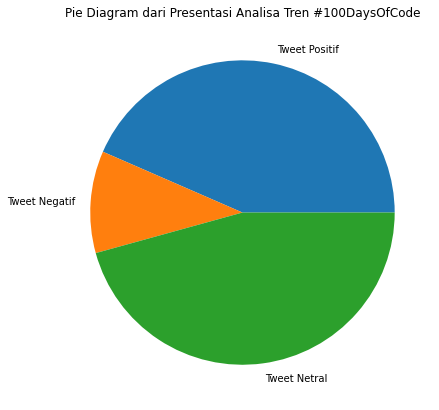

In [148]:
# library
import matplotlib.pyplot as plt
from matplotlib_venn import venn2

print('Gambaran Umum Tweet Dengan #Ngabuburit')

# Creating dataset
tren = ['Tweet Positif', 'Tweet Negatif', 'Tweet Netral']
  
data = [len(tweet_positif), len(tweet_negatif), len(tweet_netral)]
  
# Creating plot
fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = tren)
  
# show plot
plt.title('Pie Diagram dari Presentasi Analisa Tren #100DaysOfCode')
plt.show()

In [150]:
word = [None] * len(hasilAnalisis); 
for i in range(0, len(hasilAnalisis)):    
    word[i] = hasilAnalisis[i]['isi_tweet']

In [151]:
from wordcloud import WordCloud, STOPWORDS
comment_words = ''


for val in word:
    val = str(val)
    
    tokens = val.split()
    
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        
    comment_words += " ".join(tokens)+" "
    
bannedWord = ['read','more','than', 'the', 'here', 'for','and','with','your','you','pay','help','are','day','can','new','amp','from','that','how']
def RemoveBannedWords(toPrint,database):
    statement = toPrint
    pattern = re.compile("\\b(read|more|than|the|here|for|and|with|your|you|pay|help|are|day|can|new|amp|from|that|how)\\W", re.I)
    return pattern.sub("", toPrint)

comment_words = RemoveBannedWords(comment_words,bannedWord)

wordcloud = WordCloud(width = 800, height = 800,
                background_color = "white",
                min_font_size = 10).generate(comment_words)

<function matplotlib.pyplot.show(close=None, block=None)>

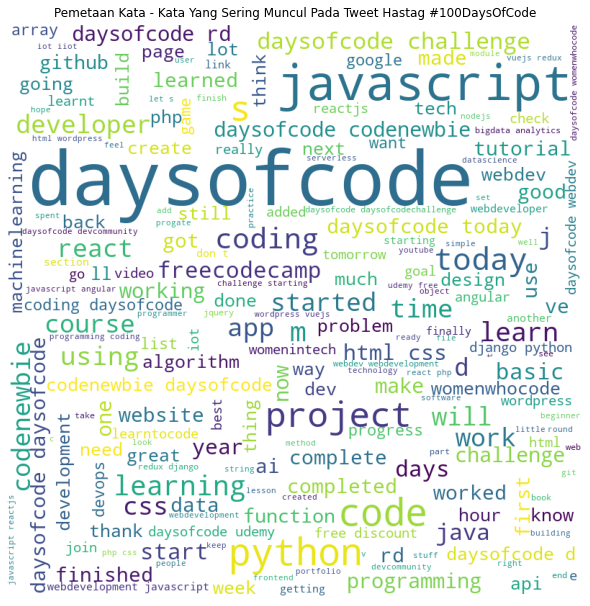

In [152]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Pemetaan Kata - Kata Yang Sering Muncul Pada Tweet Hastag #100DaysOfCode')
plt.show

In [153]:
import re
import string

frequency = {} 
text_string = comment_words
match_pattern = re.findall(r'\b[a-z]{3,15}\b', text_string)

most_word = pd.DataFrame({'word': [], 'freq': []})

for word in match_pattern:
    count = frequency.get(word,0)
    frequency[word] = count + 1
     
frequency_list = frequency.keys()

for words in frequency_list:
    most_word = most_word.append({'word': words, 'freq': frequency[words]}, ignore_index=True)

In [154]:
most_word.sort_values(by=['freq'], inplace=True, ascending = False)

In [155]:
most_word.head(10)

,word,freq
7,daysofcode,2305.0
11,javascript,570.0
22,python,357.0
219,css,263.0
147,today,262.0
96,codenewbie,248.0
191,code,237.0
25,coding,228.0
36,this,227.0
69,programming,203.0


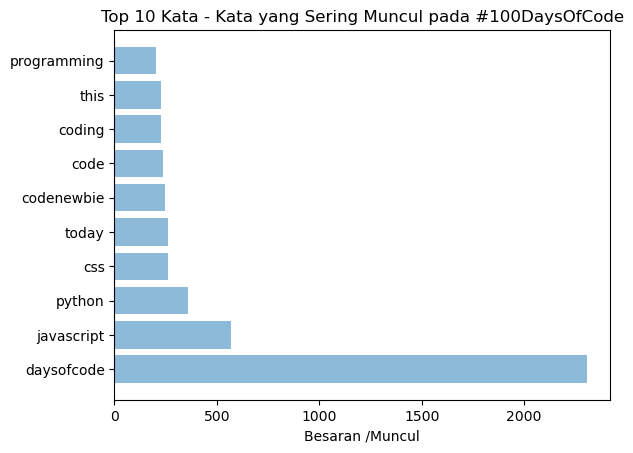

In [156]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = most_word['word'].head(10)
y_pos = np.arange(len(objects))
performance = most_word['freq'].head(10)

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Besaran /Muncul')
plt.title('Top 10 Kata - Kata yang Sering Muncul pada #100DaysOfCode')

plt.show()